## Visualizing the PyTorch model

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
%cd /content/drive/My Drive/Colab Notebooks/hw2

/content/drive/My Drive/Colab Notebooks/hw2


In [16]:
!ls

cifar10.py		resnet.log		  run_resnet.sh
cifar10.pyc		resnet_parta.log	  run_resnet_softmax.sh
convnet.log		resnet_partc_lrrate2.log  run_softmax.sh
convnet.pt		resnet_partc_lrtae3.log   run_twolayernn.sh
data			resnet_parte.log	  softmax.log
filter-visualize.ipynb	resnet.pt		  softmax.pt
log-visualize.ipynb	resnet.py		  train1.py
models			resnet_softmax_a.log	  train.py
onlyresnet.log		resnet_softmax_b.log	  vis_utils.py
onlyresnet.pt		run_convnet.sh
__pycache__		run_mymodel.sh


In [17]:
# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python2.7

In [0]:
# Parse the train and val losses one line at a time.
import re
# regexes to find train and val losses on a line
float_regex = r'[-+]?(\d+(\.\d*)?|\.\d+)([eE][-+]?\d+)?'
train_loss_re = re.compile('.*Train Loss: ({})'.format(float_regex))
val_loss_re = re.compile('.*Val Loss: ({})'.format(float_regex))
val_acc_re = re.compile('.*Val Acc: ({})'.format(float_regex))
# extract one loss for each logged iteration
train_losses = []
val_losses = []
val_accs = []
# NOTE: You may need to change this file name.
with open('convnet.log', 'r') as f:
    for line in f:
        train_match = train_loss_re.match(line)
        val_match = val_loss_re.match(line)
        val_acc_match = val_acc_re.match(line)
        if train_match:
            train_losses.append(float(train_match.group(1)))
        if val_match:
            val_losses.append(float(val_match.group(1)))
        if val_acc_match:
            val_accs.append(float(val_acc_match.group(1)))

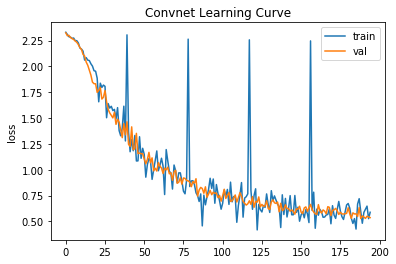

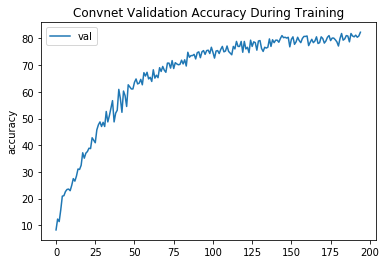

In [21]:
plt.figure()
plt.plot(train_losses, label='train')
plt.plot(val_losses, label='val')
plt.title('Convnet Learning Curve')
plt.ylabel('loss')
plt.legend()

plt.figure()
plt.plot(val_accs, label='val')
plt.title('Convnet Validation Accuracy During Training')
plt.ylabel('accuracy')
plt.legend()